In [73]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

In [74]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
# 服从均值0，标准差1的正态分布，形状(1000,2)
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0]*features[:, 0] + true_w[1] * features[:, 1]+true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape) # 添加噪音

features[0],labels[0]

(
 [-0.40887654  0.29507905]
 <NDArray 2 @cpu(0)>,
 
 [2.3866842]
 <NDArray 1 @cpu(0)>)

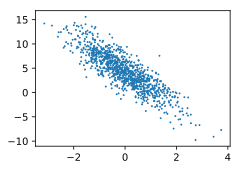

In [75]:
def use_svg_display():
    # 矢量图
    display.set_matplotlib_formats('svg')
    

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置尺寸
    plt.rcParams['figure.figsize'] = figsize
    

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1)

In [76]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 将样本顺序变为随机
    # 0-num_examples,间隔batch_size,每次读取一批
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j) # take函数根据索引返回对应元素
# 每迭代一次通过yield返回，而后停止在那里

In [77]:
batch_size = 10

# 读取随机排序后的十个数据
for X,y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[ 0.20242846 -0.790555  ]
 [-0.06944779  1.3495789 ]
 [-0.05725557  0.43389508]
 [-2.546141   -0.51934695]
 [ 0.48040214 -0.6373412 ]
 [ 0.08787205 -1.0970703 ]
 [ 0.8882513  -0.34940624]
 [-0.7277404   1.1541803 ]
 [ 0.94125223  1.6415296 ]
 [ 0.64285445  0.14136773]]
<NDArray 10x2 @cpu(0)> 
[ 7.287016  -0.5268897  2.628859   0.8539169  7.3305445  8.100388
  7.1611867 -1.1803652  0.5073943  4.995322 ]
<NDArray 10 @cpu(0)>


In [78]:
# w(2,1)
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
# b(1)
b = nd.zeros(shape=(1,))
w,b

(
 [[-0.01614336]
  [ 0.00664434]]
 <NDArray 2x1 @cpu(0)>,
 
 [0.]
 <NDArray 1 @cpu(0)>)

In [79]:
w.attach_grad()
b.attach_grad()

In [80]:
# 线性回归
def linreg(X, w, b):
    return nd.dot(X, w) + b
# 损失函数
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2/ 2

In [81]:
# 小批量随机梯度下降算法，lr=learning rate
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param -lr * param.grad / batch_size

In [82]:
lr = 0.05
num_epochs = 3
net = linreg
loss = squared_loss
# X()
for epoch in range(num_epochs): # num_epochs个迭代周期
    #  每个周期使用所有样本一次
    # X为特征，y为标签，小批量
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y) # l是有关小批量X和y的损失
        l.backward() # 小批量损失对模型求梯度
        sgd([w, b], lr, batch_size) # 使用小批量随机梯度下降迭代模型
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.000437
epoch 2, loss 0.000053
epoch 3, loss 0.000053


In [83]:
true_w, w

([2, -3.4],
 
 [[ 1.999531]
  [-3.400127]]
 <NDArray 2x1 @cpu(0)>)

In [84]:
true_b, b

(4.2,
 
 [4.2000375]
 <NDArray 1 @cpu(0)>)